# **1. Perkenalan Dataset**


Dataset yang digunakan untuk eksperimen ini adalah [Telco Customer Churn](https://www.kaggle.com/datasets/blastchar/telco-customer-churn) dari Kaggle. Dataset tersebut memprediksi tingkah laku konsumen. Fitur yang disediakan adalah seperti:
1. Churn (Konsumen yang pergi meninggalkan layanan pada bulan sebelumnya)
2. Services Columns (Kolom data layanan yang digunakan konsumen)
3. Customer Account Information (Data konsumen)
4. Demographic (Gender, usia, dll. dari konsumen)
5. Dll.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import joblib
import os

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/telco-customer-churn


In [4]:
os.listdir(path)

['WA_Fn-UseC_-Telco-Customer-Churn.csv']

In [5]:
df = pd.read_csv(path + "/WA_Fn-UseC_-Telco-Customer-Churn.csv")

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

Berikut adalah preview 5 baris dari dataset yang akan digunakan:

In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Berdasarkan `df.info()` di atas, dataset ini berisi 7043 baris data dan tidak ada data yang null. Tipe datanya sendiri terdiri dari object, int, dan float.

In [38]:
print("Shape:", df.shape)
print("\nColumns:\n", df.columns)
print("\nDuplicates:", df.duplicated().sum())
print("\nMissing Values:\n", df.isnull().sum())

Shape: (7043, 21)

Columns:
 Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Duplicates: 0

Missing Values:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


Cell di atas adalah informasi lebih lengkap dari dataset. Dataset terdiri dari 21 kolom dan 7043 baris, dengan kolom yang disebut, dan tidak ada duplikat ataupun null.

Berikut adalah distribusi data dari churning pelanggan:

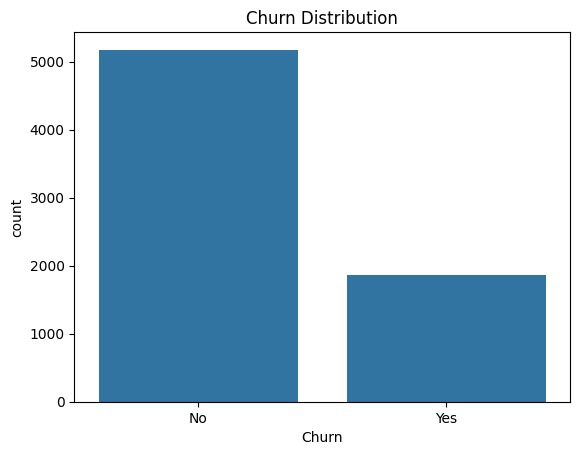

In [29]:
# Churn Distribution
churn_plot = sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

Sebanyak lebih dari 5000 pelanggan masih menggunakan layanan, sedangkan sekitar 1800 pelanggan telah berhenti menggunakan layanan yang disediakan.

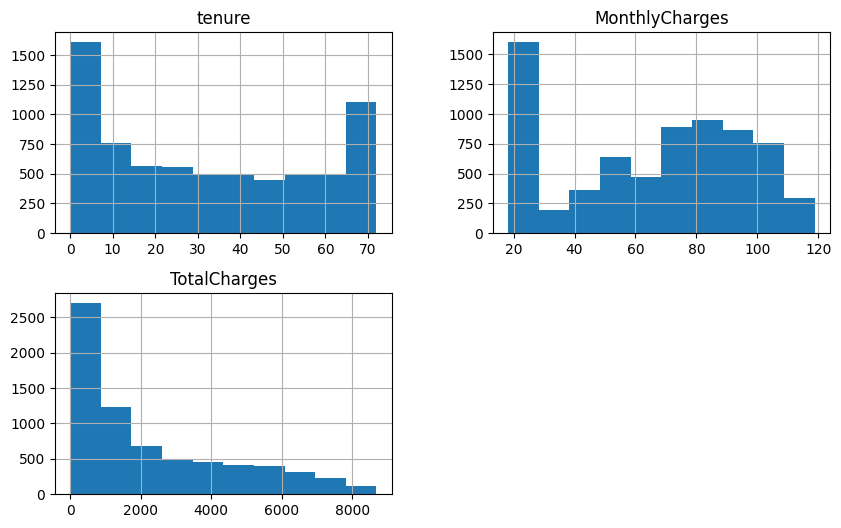

In [34]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'].replace(' ', '0'), errors='coerce')
df[['tenure', 'MonthlyCharges', 'TotalCharges']].hist(figsize=(10, 6))
plt.show()

Berikut adalah informasi yang dapat diambil dari histogram berikut:
1. Tenure: Lebih dari 1500 konsumen hanya 0-10 bulan menggunakan layanan perusahaan. Akan tetapi ada juga konsumen yang menggunakan layanan sebanyak 60-70 bulan. Hal ini berarti konsumen banyak yang pergi dan tidak memperpanjang layanan dalam jangka waktu 10 bulan pertama.
2. MonthlyCharges: Lebih dari 1500 konsumen dikenakan biaya sebanyak 20, namun ada juga yang lebih dari 70.
3. TotalCharges: Sebagian besar pelanggan memiliki total biaya yang relatif rendah.

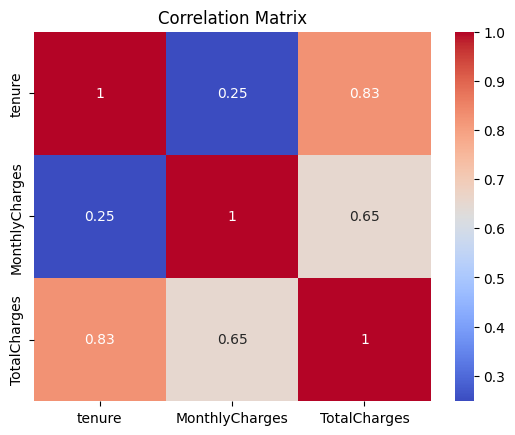

In [32]:
corr = df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Berdasarkan heatmap, korelasi tertinggi pada kolom numerik adalah antara Tenure dengan Total Charges, dan Monthly Charges dengan Total Charges.

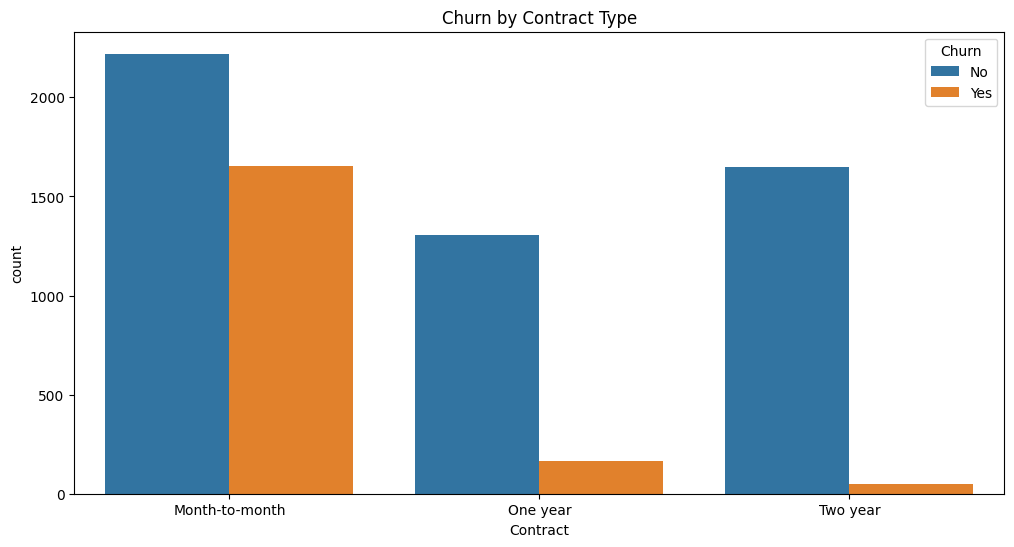

In [39]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn by Contract Type')
plt.show()

Berdasarkan plot tersebut, tingkat churn konsumen paling tinggi adalah konsumen dengan tipe kontak month-to-month atau per bulan. Sedangkan churn terkecil dari konsumen dengan kontrak sepanjang 2 tahun.

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [ ]:
# Drop irrelevant column(s)
df = df.drop('customerID', axis=1)

In [51]:
# Encode target feature
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Define Features
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical_features = ['gender', 'Partner', 'InternetService', 'Contract']

# Encoding and Standardization Features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

# Apply preprocessing
X = preprocessor.fit_transform(df.drop('Churn', axis=1))
y = df['Churn']

In [52]:
# Convert X to DataFrame and get feature names
feature_names =(
    numerical_features +
    list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)))
X_df = pd.DataFrame(X.toarray() if hasattr(X, "toarray") else X, columns=feature_names)

# Combine X and y into one DataFrame
combined_data = pd.concat([X_df, y.rename('Churn')], axis=1)

In [53]:
combined_data.to_csv('preprocessed_telco.csv', index=False)